In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/county_election_results.csv')
df['pct_D'] = (df['votes_D_2020'] / df['votes_total_2020']) * 100
df['pct_R'] = (df['votes_R_2020'] / df['votes_total_2020']) * 100

# Keys

STATE = 'state'
PCT_D = 'pct_D'
PCT_R = 'pct_R'
V_TOTAL = 'votes_total_2020'
V_D = 'votes_D_2020'
V_R = 'votes_R_2020'


**1.** Elija dos estados de EEUU y compare la distribución de votos republicanos y demócratas a través de estadísticas descriptivas. Elabore también un gráfico de caja, y comente sobre las similitudes y diferencias que puede inferir a partir del análisis exploratorio gráfico y cuantitativo.<br>

In [39]:
group = df.groupby(STATE)[[PCT_D, PCT_R]].mean()

state_more_d = group[PCT_D].idxmax()
state_more_r = group[PCT_R].idxmax()

print("Estado con mayor votación demócrata", state_more_d, group[PCT_D][state_more_d], group[PCT_R][state_more_d])
print("Estado con mayor votación republicano", state_more_r, group[PCT_D][state_more_r], group[PCT_R][state_more_r])

states = [state_more_d, state_more_r]
df_states = df[df['state'].isin(states)]

Estado con mayor votación demócrata DC 93.23048265974074 5.4606245078798
Estado con mayor votación republicano NE 19.888194452640803 78.28542544433259


Note: Incluso en el estado con mayor influencia republicana, dicha influencia no es tan fuerte como la influencia de los demócratas en su estado de mayor domino

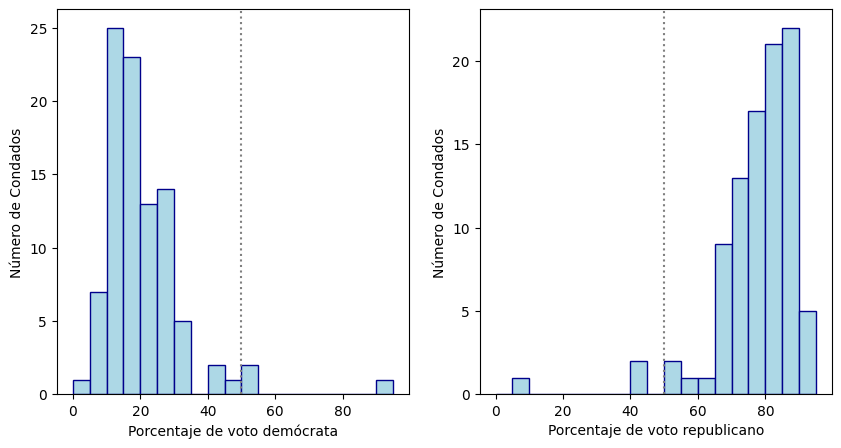

In [40]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

bins = np.arange(0,100,5)

ax1.hist(df_states[PCT_D], bins=bins, histtype='bar', ec='darkblue', fc='lightblue')
ax2.hist(df_states[PCT_R], bins=bins, histtype='bar', ec='darkblue', fc='lightblue')

def plot(ax, label):
    ax.set_xlabel(label)
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50, ls=':', color='gray')

plot(ax1, 'Porcentaje de voto demócrata')
plot(ax2, 'Porcentaje de voto republicano')

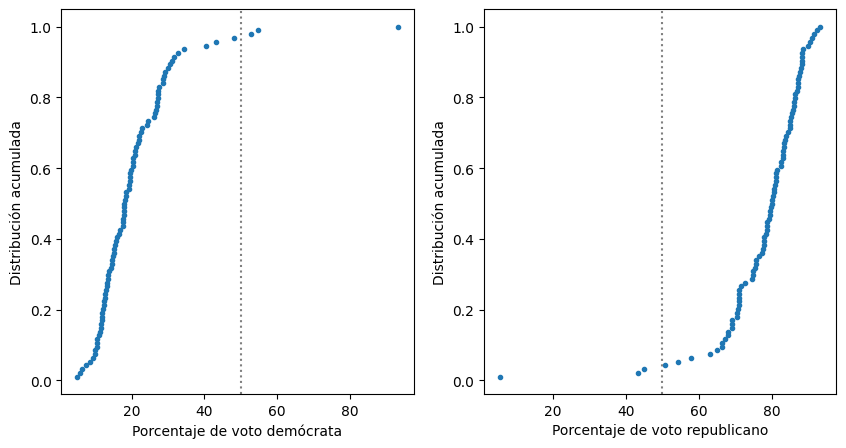

In [43]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

def plot(x, y, ax, label):
    ax.plot(x, y, marker='.', ls='none')
    ax.set_xlabel(label)
    ax.set_ylabel('Distribución acumulada')
    ax.axvline(x=50,ls=':',color='gray')

x, y = fdae(df_states[PCT_D])
plot(x, y, ax1, 'Porcentaje de voto demócrata')

x, y = fdae(df_states[PCT_R])
plot(x, y, ax2, 'Porcentaje de voto republicano')

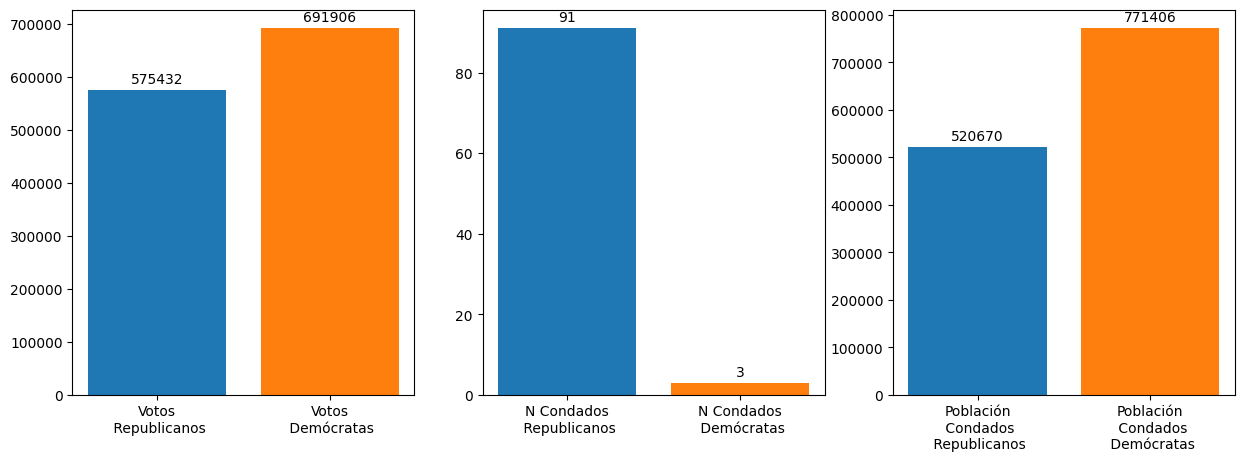

In [123]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

bar_colors = ['tab:blue', 'tab:orange']

labels = 'Votos\n Republicanos', 'Votos\n Demócratas'
sizes = [df_states[V_R].sum(), df_states[V_D].sum()]

rects = ax1.bar(labels, sizes, color=bar_colors)
ax1.bar_label(rects, padding=3)

county_r = df_states[df_states[PCT_R] > 50]
county_d = df_states[df_states[PCT_D] > 50]

labels = 'N Condados\n Republicanos', 'N Condados\n Demócratas'
sizes = [len(county_r), len(county_d)]

rects = ax2.bar(labels, sizes, color=bar_colors)
ax2.bar_label(rects, padding=3)

labels = 'Población\n Condados\n Republicanos', 'Población\n Condados\n Demócratas'
sizes = [county_r[V_TOTAL].sum(), county_d[V_TOTAL].sum()]

rects = ax3.bar(labels, sizes, color=bar_colors)
_ = ax3.bar_label(rects, padding=3)


In [127]:
print(len(county_d), len(county_d[county_d[STATE] == state_more_r]), county_d[county_d[STATE] == state_more_r][V_TOTAL].sum())

3 2 431042


**2.** A partir de los datos entregados, estudie la posible correlación entre la fracción de votos republicanos (o demócratas) y alguna otras de las variables incluidas en la base de datos. Puede trabajar con todos los estados, o con alguna selección de ellos. Para este estudio, se requiere:<br>

a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>
b) Plantear una hipótesis que refleje esta correlación.<br>
c) Diseñar y realizar el test de hipótesis.<br>
d) Concluir acerca de la validez y significancia de la correlación identificada.<br>

In [130]:
df.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [144]:
columns = [
    'FIPS', 'eevp', 'D_winner', 
    'pct_D', 'pct_R', 'Unemployment Rate', 
    'Unemployment', 'Employment', 'Labor Force', 
    'acs_pct_pop_nonwhite', 'acs_pct_management', 
    'acs_pct_service', 'pct_pop25+_bachelor_higher',
    'median_household_income', 'per_capita_income', 'deaths',
    # 'deaths_per_thousand', 'deaths_percap_pctile', 'cases'
]

df['D_winner'] = df['winner'].map({'R': 0, 'D': 1})
df[columns]

,FIPS,eevp,D_winner,pct_D,pct_R,Unemployment Rate,Unemployment,Employment,Labor Force,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,deaths
0,1061,100,0,12.726402,86.555493,3.9,428.0,10519.0,10947.0,16.065834,25.1,16.0,11.1,38142.0,20471.0,7
1,1021,100,0,15.937970,83.424096,4.7,925.0,18628.0,19553.0,19.861143,24.3,13.3,14.2,45182.0,24611.0,31
2,1049,100,0,14.611919,84.534781,3.8,1225.0,31427.0,32652.0,19.324438,23.2,15.8,12.7,39233.0,21004.0,26
3,1093,100,0,10.614525,88.551114,4.2,584.0,13221.0,13805.0,8.029368,26.0,14.2,13.1,35392.0,21391.0,29
4,1059,100,0,16.597708,82.558880,3.6,557.0,14706.0,15263.0,22.918648,23.7,13.9,12.9,40459.0,19776.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,45083,100,0,35.603242,62.937674,7.0,10973.0,145208.0,156181.0,31.409851,31.0,15.7,23.8,50179.0,26072.0,211
2294,45021,100,0,27.633558,71.400871,8.3,2199.0,24246.0,26445.0,27.081166,22.8,15.1,13.8,35836.0,21432.0,48
2295,45051,100,0,32.924604,66.105684,8.2,12334.0,137231.0,149565.0,22.831279,28.2,25.1,23.6,48279.0,26917.0,207
2296,45089,100,0,64.366594,34.607444,9.4,1189.0,11429.0,12618.0,68.795999,23.7,21.2,12.7,32351.0,18454.0,46


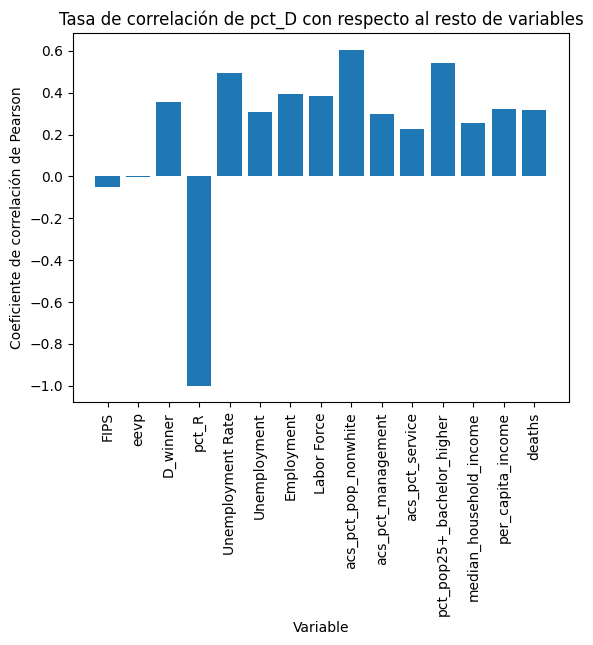

In [145]:
corr_matrix = df[columns].corr()

var = 'nombre_variable' #ingresa el nombre de la variable de interés en donde dice 'nombre_variable'
corr_var = corr_matrix[PCT_D].drop(PCT_D)
plt.bar(corr_var.index, corr_var.values)
plt.title(f'Tasa de correlación de {PCT_D} con respecto al resto de variables')
plt.xlabel('Variable')
plt.ylabel('Coeficiente de correlación de Pearson')
plt.xticks(rotation=90)
plt.show()

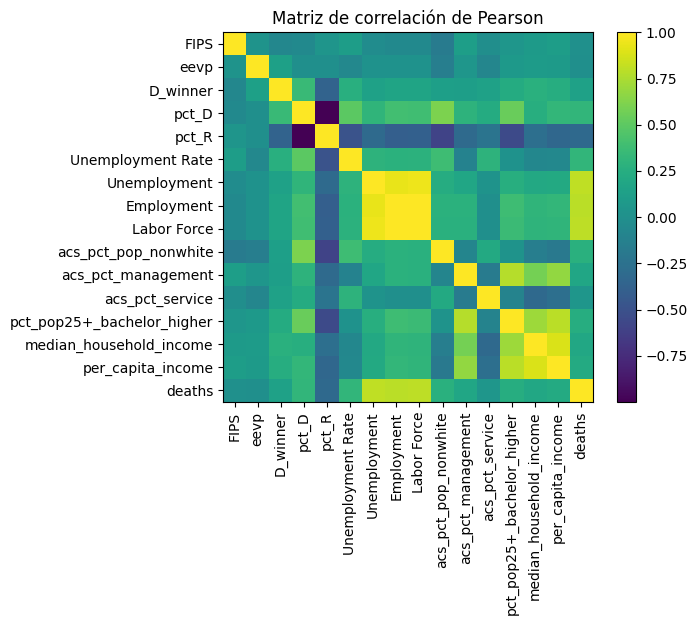

In [146]:
plt.imshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Matriz de correlación de Pearson')
plt.show()

Covarianza: 181.38390400501925
Pearson: 0.6063345305293207


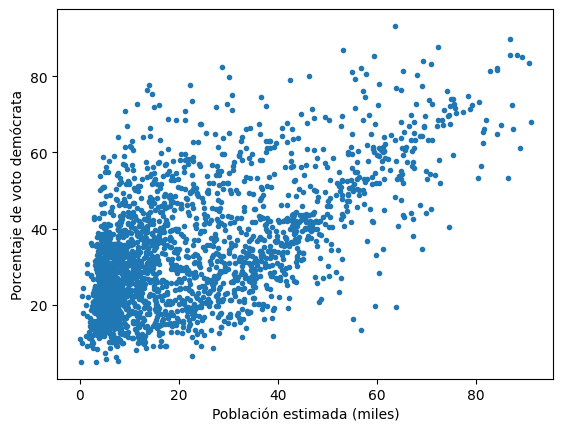

In [169]:
x = df['acs_pct_pop_nonwhite']
y = df['pct_D']

cov = np.cov(x,y)
print('Covarianza:', cov[0,1])

pearson = np.corrcoef(x,y)
print('Pearson:', pearson[0,1])

#scatter plot:
plt.plot( x, y, '.')
plt.xlabel('Población estimada (miles)')
_ = plt.ylabel('Porcentaje de voto demócrata')

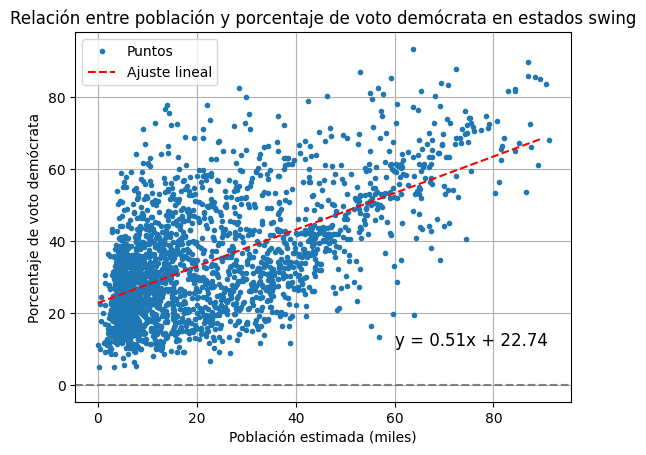

In [180]:
a, b = np.polyfit(x, y, 1)
xf = np.arange(0, 100, 10)
yf = a * xf + b
plt.plot(x, y, '.', label='Puntos')
plt.plot(xf, yf, '--', color='red', label='Ajuste lineal')

# Título, leyenda y etiquetas de los ejes
plt.title('Relación entre población y porcentaje de voto demócrata en estados swing')
plt.xlabel('Población estimada (miles)')
plt.ylabel('Porcentaje de voto demócrata')
plt.legend()

# Coeficiente de correlación
# plt.text(700, 10, f'Coeficiente de correlación: {pearson[0,1]:.2f}', fontsize=12, ha='left', va='bottom')
plt.axhline(y=0, color='gray', linestyle='--')

# Ecuación de la recta
plt.text(60, 10, f'y = {a:.2f}x + {b:.2f}', fontsize=12, ha='left', va='bottom')

# Cuadrícula de fondo
plt.grid(True)

# Mostrar el gráfico
plt.show()